# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>


## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# 1.1 Reading Data

In [242]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
##from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
##from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
## os.chdir('C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose')
import time
from scipy.sparse import hstack

In [243]:
project_data = pd.read_csv('c:\\train_data.csv')
resource_data = pd.read_csv('c:\\resources.csv')

In [244]:
print("Number of points in train data", project_data.shape)
print('_ '*35)
print("The attribute Names",project_data.columns.values)
#project_data.head(20)

Number of points in train data (109248, 17)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
The attribute Names ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [245]:
print("Number of points in resource data :", resource_data.shape)
print("attributes in resource data :", resource_data.columns.values)
resource_data.head(2)

Number of points in resource data : (1541272, 4)
attributes in resource data : ['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [246]:
def preprocessing_catogories(Datafile,AttributeName,ReplaceName):
    categories = list(Datafile[AttributeName].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
    cat_list = []
    for CurrentRow in tqdm(categories):
        temp = ""
        # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for word in CurrentRow.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in word.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                word=word.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            word = word.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=word.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())

    # Appending Cleaned Attribute list and removing the old attribute
    Datafile[ReplaceName]=cat_list
    Datafile.drop([AttributeName],axis=1,inplace=True)
    
    
    # counting the categories and sorting newly created list 
    my_counter = Counter()
    for word in tqdm(Datafile[ReplaceName].values):
        my_counter.update(word.split())
    
    cat_list = dict(my_counter)
    sorted_result = dict(sorted(cat_list.items(),key=lambda kv:kv[1]))
    return  sorted_result
 
    

In [247]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    # \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
    
    phrase = phrase.replace('\\r', ' ')
    phrase = phrase.replace('\\"', ' ')
    phrase = phrase.replace('\\n', ' ')
    
    #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
    phrase = re.sub('nannan','', phrase)
    return phrase.strip()

In [248]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [249]:
def preprocessing_text(data):
    # Combining all the above statemennts 
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = re.sub('nannan','', sent)
    # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

### Preprocessing project_grade_categories

In [250]:
data = project_data['project_grade_category']
project_data.drop(['project_grade_category'],axis=1,inplace=True)

In [251]:
project_grade_category = []
for ele in data:
    project_grade_category.append(ele.replace(" ","_"))
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [252]:
project_data['project_grade_category']=project_grade_category
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime         project_subject_categories  \
0           IN        2016-12-05 13:43:57                Literacy & Language   
1           FL        2016-10-25 09:22:10  History & Civics, Health & Sports   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category  
0          Grades_PreK-2  
1             Grades_6-8

### Preprocessing project_subject_categories

In [253]:
sorted_cat_dict = preprocessing_catogories(project_data,'project_subject_categories','clean_categories')
project_data.head(2)

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 388339.23it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime     project_subject_subcategories  \
0           IN        2016-12-05 13:43:57                     ESL, Literacy   
1           FL        2016-10-25 09:22:10  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  
0          Grades_PreK-2             Literacy_Language  
1             Grades_6-8  History_Civics Health_Sports

### Preprocessing project_subject_subcategories

In [254]:
sorted_sub_cat_dict = preprocessing_catogories(project_data,'project_subject_subcategories','clean_subcategories')
project_data.head(2)

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 393985.16it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  
0                  ESL Literacy  
1  Civics_Government TeamSports

## Text Preprocessing

### Finding number of words in title and appending it to new column
   - This can be used as Numerical Feature for Vectorisation

In [255]:
title_word_count = []
for word in project_data['project_title']:
    title_word_count.append(len(word.split()))

In [256]:
project_data["title_word_count"] = title_word_count
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  
0                  ESL Literacy                 7  
1  Civics_Government TeamSports                 5

In [257]:
# merge two column text dataframe: 
project_data["Essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [258]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                               Essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

### Preprocessing Essay in project_data

In [259]:
preprocessed_essay=preprocessing_text(project_data['Essay'])

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:06<00:00, 1646.24it/s]


In [260]:
# after preprocesing
project_data["clean_essays"] = preprocessed_essay
preprocessed_essay[10000]

'my kids caring curious individuals they pretty much clap time science love figuring world around works they value community overcome economic disadvantages special needs active learners classroom while rural district one largest area even small community mindset knowing helping neighbors our class believes capable effort perseverance great things wi looking set book clubs involve student family every night give reading 20 minutes assignment i would like change assignment 10 minutes family member reading 10 minutes student reading aloud after reading log onto google classroom page submit reflection questions read i choosing two classic books engaging students adults these books personal favorites contributed rich diverse discussions previous classes i think giving family members topics discuss child promote type questioning analysis promote classroom families able discuss books using google classroom post comment features topics i post i able measure involvement many posts family makes

In [261]:
project_data.drop(['Essay'], axis=1, inplace=True)

In [262]:
preprocessed_titles=preprocessing_text(project_data['project_title'])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:03<00:00, 33732.54it/s]


### Finding number of words in the essay and added in as a new column

In [263]:
essay_word_count = []
for words in project_data['clean_essays']:
    essay_word_count.append(len(words.split()))

In [264]:
project_data["essay_word_count"] = essay_word_count
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays  essay_word_count  
0  my students english learners working english s...               160  
1  our students arrive school eager learn they po...               108

### Calculating Sentiment Scores for the Essay Feature

In [265]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [266]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [267]:
analyser = SentimentIntensityAnalyzer()

In [268]:
## http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html
neg = []
pos = []
neu = []
compound = []

for words in tqdm(project_data["clean_essays"]) :
    Negative = analyser.polarity_scores(words)['neg']
    Positive = analyser.polarity_scores(words)['pos']
    Neutral = analyser.polarity_scores(words)['neu']
    Compound = analyser.polarity_scores(words)['compound']
    neg.append(Negative)
    pos.append(Positive)
    neu.append(Neutral)
    compound.append(Compound)

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [12:58<00:00, 140.31it/s]


In [269]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

     ...    project_grade_category              clean_categories  \
0    ...             Grades_PreK-2             Literacy_Language   
1    ...                Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays essay_word_count    pos  \
0  my students english learners working english s...              160  0.144   
1  our students arrive school eager learn they po...              108  0.285   

     neg    neu  compound  
0  0.012  0.843    0.9694  
1  0.049  0.667    0.9856  

[2 rows x 24 columns]

### Spliting Project_Data into Train,Test,CV Data sets

In [270]:
#Splitting train and test data from the original data
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],
                                                    test_size =0.33, stratify = project_data['project_is_approved'])
#Splitting train data in to train and cross validation data
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.33,stratify = y_train)

### Dropping 'project_is_approved' column as we already moved it y_train and y_test

In [271]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [272]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(49041, 23)
(36052, 23)
(24155, 23)


In [273]:
# printing some random reviews
print(X_train['clean_essays'].values[0])
print("="*50)
print(X_train['clean_essays'].values[500])
print("="*50)
print(X_train['clean_essays'].values[1000])
print("="*50)
print(X_train['clean_essays'].values[10000])
print("="*50)
print(X_train['clean_essays'].values[20000])
print("="*50)

the students school excited participating school activities they need volleyballs help learn play game well host schools volleyball matches the children learn play together work team learn individual volleyball skills become better athletes well students when another school comes play school not enough volleyballs everyone warm get ready volleyball match the athletes needs volleyballs practice individual skills become better players students the volleyballs would used daily basis practice games the school volleyball team would also able host volleyball matches schools district it difficult play schools not proper equipment the kids school would love opportunity play volleyball schools district the children become better athletes focus need work individually
my students live high poverty rural community they face challenges classroom their school classroom constant lives place enjoy going day i strive make classroom place learning challenging fun more students enter classroom dealing ad

In [274]:
sent = decontracted(X_train['clean_essays'].values[500])
print(sent)
print("="*50)

my students live high poverty rural community they face challenges classroom their school classroom constant lives place enjoy going day i strive make classroom place learning challenging fun more students enter classroom dealing add adhd they trouble focusing paying attention throughout day i often see moving fidgeting desks at times i students get no reason move around they tell not sit still knowing i want provide students healthier alternatives typical seating one might see elementary classroom allowing flexibility seating provide great success classroom they need move throughout day would unhealthy each student walks door capable learning its time give environment best suits needs the elementary classroom changed since i school students cannot sit still they need move times order stay focused task hand i see daily basis the hokki stools used alternative seating students need get wiggles work they safe healthy alternative traditional seating classroom i plan first use students diag

### Preprocessing Train Dataset(Essay Featrues)

In [275]:
X_train['clean_essays']

79011     the students school excited participating scho...
47812     this project made support amazing students wal...
78251     i 30 enthusiastic fourth graders include speci...
59166     hello thank looking class page i 25 students 3...
61557     my students hard working bright young individu...
102989    my students great bunch kids they 5th graders ...
32421     our school albany park chicago our school runs...
50594     the students first grade class come variety ba...
83553     but help those words student wrote end last ye...
83983     there 21 4th grade students class they part sc...
39255     my students excited loving engaged creative le...
82264     our school emphasizes inclusion students speci...
86600     my students kindergarten many not attend presc...
78972     we elementary school situated small town misso...
26727     my students vivacious dedicated talented bunch...
45660     my students always excited learn they motivate...
45759     i diverse group learners 6th 8

## 1.4 Preparing data for models

In [276]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'title_word_count', 'clean_essays', 'essay_word_count', 'pos', 'neg',
       'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### One Hot Encoding for categories

In [277]:
# we use count vectorizer to convert the values into one hot encoded features
def vec_cat_data_OneHot(DataFile,AttributeName,sorted_categorical_dict,Train):
    vectorizer = CountVectorizer(vocabulary=list(sorted_categorical_dict.keys()), lowercase=False, binary=True)
    
    if Train:
        vectorizer.fit_transfrom(DataFile[AttributeName].values)
        print(vectorizer.get_feature_names())
    else: 
        vectorizer.transform(DataFile[AttributeName].values)
        print(vectorizer.get_feature_names())
        
    
    AttributeNames=vectorizer.get_feature_names()
    
    result = vectorizer.transform(DataFile[AttributeName].values)
    print("Shape of matrix after one hot encodig ",result.shape)
    return result, AttributeNames

### One Hot Encoding for X_train clean_categories

In [278]:
categories_one_hot_train,ArNa_clean_categories = vec_cat_data_OneHot(X_train,'clean_categories',sorted_cat_dict,Train = True)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (49041, 9)


### One Hot Encoding for X_test clean_categories

In [279]:
categories_one_hot_test, ArNa_clean_categories = vec_cat_data_OneHot(X_test,'clean_categories',sorted_cat_dict,Train=False)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (36052, 9)


### One Hot Encoding for X_cv clean_categories

In [280]:
categories_one_hot_cv, ArNa_clean_categories = vec_cat_data_OneHot(X_cv,'clean_categories',sorted_cat_dict,Train=False)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (24155, 9)


### One Hot Encoding for X_train clean_sub_categories

In [281]:
sub_categories_one_hot_train, ArNa_clean_subcategories = vec_cat_data_OneHot(X_train,'clean_subcategories',sorted_sub_cat_dict,Train=True)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (49041, 30)


### One Hot Encoding for X_test clean_sub_categories

In [282]:
sub_categories_one_hot_test, ArNa_clean_subcategories = vec_cat_data_OneHot(X_test,'clean_subcategories',sorted_sub_cat_dict,Train= False)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (36052, 30)


### One Hot Encoding for X_cv clean_sub_categories

In [283]:
sub_categories_one_hot_cv, ArNa_clean_subcategories = vec_cat_data_OneHot(X_cv,'clean_subcategories',sorted_sub_cat_dict,Train= False)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (24155, 30)


### Performing One Hot Encoding for school_state

In [284]:
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

In [285]:
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(),key=lambda kv:kv[1]))

### Performing One Hot Encoding for school_state; X_train

In [286]:
school_state_categories_one_hot_train, ArNa_school_state = vec_cat_data_OneHot(X_train,'school_state',sorted_school_state_dict,Train= True)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (49041, 51)


### Performing One Hot Encoding for school_state; X_test

In [287]:
school_state_categories_one_hot_test, ArNa_school_state = vec_cat_data_OneHot(X_test,'school_state',sorted_school_state_dict,Train= False)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (36052, 51)


### Performing One Hot Encoding for school_state; X_cv

In [288]:
school_state_categories_one_hot_cv, ArNa_school_state = vec_cat_data_OneHot(X_cv,'school_state',sorted_school_state_dict,Train= False)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (24155, 51)


In [289]:
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())

In [290]:
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(),key=lambda kv:kv[1]))

### Performing One Hot Encoding for Project_Grade_Category; X_train

In [291]:
project_grade_categories_One_Hot_train, ArNa_project_grade_category = vec_cat_data_OneHot(X_train,'project_grade_category',sorted_project_grade_category_dict,Train= True)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix after one hot encodig  (49041, 4)


### Performing One Hot Encoding for Project_Grade_Category; X_test

In [292]:
project_grade_categories_One_Hot_test, ArNa_project_grade_category = vec_cat_data_OneHot(X_test,'project_grade_category',sorted_project_grade_category_dict,Train= False)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix after one hot encodig  (36052, 4)


### Performing One Hot Encoding for Project_Grade_Category; X_cv

In [293]:
project_grade_categories_One_Hot_cv, ArNa_project_grade_category = vec_cat_data_OneHot(X_cv,'project_grade_category',sorted_project_grade_category_dict,Train= False)

['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']
Shape of matrix after one hot encodig  (24155, 4)


### Performing One Hot Encoding for teacher_prefix

In [294]:
data = project_data['teacher_prefix']
project_data.drop(['teacher_prefix'],axis=1,inplace=True)

In [295]:
teacher_prefix = []
for ele in data:
    temp = re.search(r'[a-zA-Z]+',str(ele)).group()
    temp = temp.replace("Teacher","Mrs")
    if pd.isnull(ele):
        temp = temp.replace("nan","Mrs")
    teacher_prefix.append(temp)


In [296]:
project_data['teacher_prefix']=teacher_prefix
project_data.head(2)

Unnamed: 0       id                        teacher_id school_state  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           IN   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a           FL   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4       ...                    clean_categories  \
0             NaN       ...                   Literacy_Language   
1             NaN       ...        History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays essay_word_count    pos  \
0  my students english learners working english s...              160  0.144   
1  our students arrive school eager learn they po...              108  0.285   

     neg    neu  compound  teacher_prefix  
0  0.012  0.843    0.9694             Mrs  
1  0.049  0.667    0.9856              Mr  

[2 rows x 24 columns]

In [297]:
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(str(word).split())

In [298]:
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(),key=lambda kv:kv[1]))

In [299]:
## ValueError: np.nan is an invalid document, expected byte or unicode string.
## The link below explains h0w to tackle such discrepancies.
## https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document/39308809#39308809

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))


teacher_prefix_categories_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype("U"))

print(vectorizer.get_feature_names())

ArNa_teacher_prefix_categories = vectorizer.get_feature_names()

print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)


['Dr', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encoding  (49041, 4)
Shape of matrix after one hot encoding  (36052, 4)
Shape of matrix after one hot encoding  (24155, 4)


### Vectorizing Text data

### Bag of words on preprocessed_essay; Train, Test, CV

In [300]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_train = vectorizer.fit_transform(X_train["clean_essays"])
text_bow_test = vectorizer.transform(X_test["clean_essays"])
text_bow_cv = vectorizer.transform(X_cv["clean_essays"])

print("Shape of matrix after one hot encodig for X_train  ",text_bow_train.shape)
print("Shape of matrix after one hot encodig for X_test   ",text_bow_test.shape)
print("Shape of matrix after one hot encodig for X_cv     ",text_bow_cv.shape)

Shape of matrix after one hot encodig for X_train   (49041, 12185)
Shape of matrix after one hot encodig for X_test    (36052, 12185)
Shape of matrix after one hot encodig for X_cv      (24155, 12185)


###  Bag of words on project_title; Train, Test, CV

In [301]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow_train = vectorizer.fit_transform(X_train['project_title'])
title_bow_test = vectorizer.transform(X_test['project_title'])
title_bow_cv = vectorizer.transform(X_cv['project_title'])

print("Shape of matrix after one hot encodig for X_train  ",title_bow_train.shape)
print("Shape of matrix after one hot encodig for X_test   ",title_bow_test.shape)
print("Shape of matrix after one hot encodig for X_cv     ",title_bow_cv.shape)

Shape of matrix after one hot encodig for X_train   (49041, 2101)
Shape of matrix after one hot encodig for X_test    (36052, 2101)
Shape of matrix after one hot encodig for X_cv      (24155, 2101)


### TFIDF vectorizer on preprocessed_essay; Train, Test, CV

In [302]:
vectorizer = CountVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(X_train["clean_essays"])
text_tfidf_test = vectorizer.transform(X_test["clean_essays"])
text_tfidf_cv = vectorizer.transform(X_cv["clean_essays"])

print("Shape of matrix after one hot encoding for X_train ",text_tfidf_train.shape)
print("Shape of matrix after one hot encoding for X_test  ",text_tfidf_test.shape)
print("Shape of matrix after one hot encoding for X_cv    ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding for X_train  (49041, 12185)
Shape of matrix after one hot encoding for X_test   (36052, 12185)
Shape of matrix after one hot encoding for X_cv     (24155, 12185)


### TFIDF vectorizer on project title; Train, Test, CV

In [303]:
vectorizer = CountVectorizer(min_df=10)
title_tfidf_train = vectorizer.fit_transform(X_train['project_title'])
title_tfidf_test = vectorizer.transform(X_test['project_title'])
title_tfidf_cv = vectorizer.transform(X_cv['project_title'])

print("Shape of matrix after one hot encoding X_train ",title_tfidf_train.shape)
print("Shape of matrix after one hot encoding X_test  ",title_tfidf_test.shape)
print("Shape of matrix after one hot encoding X_cv    ",title_tfidf_cv.shape)


Shape of matrix after one hot encoding X_train  (49041, 2101)
Shape of matrix after one hot encoding X_test   (36052, 2101)
Shape of matrix after one hot encoding X_cv     (24155, 2101)


### Using Pretrained Models: Avg W2V on Essay; Train, Test, CV

In [304]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [305]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('c:\\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [306]:
# average Word2Vec
# compute average word2vec for each review.


def preprocessing_avg_w2v_vectors(DataFile):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(DataFile): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
    print("="*50)
    return avg_w2v_vectors

In [307]:
avg_w2v_vectors_train = preprocessing_avg_w2v_vectors(X_train['clean_essays'])
time.sleep(0.5)
avg_w2v_vectors_test = preprocessing_avg_w2v_vectors(X_test['clean_essays'])
time.sleep(0.5)
avg_w2v_vectors_cv = preprocessing_avg_w2v_vectors(X_cv['clean_essays'])


100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:14<00:00, 3454.46it/s]


49041
300


100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:09<00:00, 3625.95it/s]


36052
300


100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:07<00:00, 3379.19it/s]

24155
300


###  AVG W2V on project_title; Train, Test, CV

In [308]:
avg_w2v_vectors_titles_train = preprocessing_avg_w2v_vectors(X_train['project_title'])
time.sleep(0.5)
avg_w2v_vectors_titles_test = preprocessing_avg_w2v_vectors(X_test['project_title'])
time.sleep(0.5)
avg_w2v_vectors_titles_cv = preprocessing_avg_w2v_vectors(X_cv['project_title'])

100%|████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 146602.73it/s]


49041
300


100%|████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 146560.34it/s]


36052
300


100%|████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 161430.68it/s]

24155
300


In [310]:
def preprocessed_tfidf_w2v_vectors(DataFile):
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(DataFile): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
             vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    print("="*50)
    return tfidf_w2v_vectors

In [309]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### TFIDF weighted W2V on preprocessed essay; Train, Test, CV

In [311]:
tfidf_w2v_vectors_train  = preprocessed_tfidf_w2v_vectors(X_train['clean_essays'])
time.sleep(0.5)
tfidf_w2v_vectors_test  = preprocessed_tfidf_w2v_vectors(X_test['clean_essays'])
time.sleep(0.5)
tfidf_w2v_vectors_cv  = preprocessed_tfidf_w2v_vectors(X_cv['clean_essays'])


100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:41<00:00, 484.09it/s]


49041
300


100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:12<00:00, 499.06it/s]


36052
300


100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:46<00:00, 515.11it/s]

24155
300


In [312]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

### TFIDF weighted W2V on project_title; Train, Test, CV

In [313]:
tfidf_w2v_vectors_titles_train   = preprocessed_tfidf_w2v_vectors(X_train['project_title'])
time.sleep(0.5)
tfidf_w2v_vectors_titles_test   = preprocessed_tfidf_w2v_vectors(X_test['project_title'])
time.sleep(0.5)
tfidf_w2v_vectors_titles_cv   = preprocessed_tfidf_w2v_vectors(X_cv['project_title'])

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 93071.42it/s]


49041
300


100%|████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 103921.35it/s]


36052
300


100%|████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 115353.03it/s]


24155
300


### Vectorizing Numerical features

### Price Feature

In [314]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#Now join price data to Train,Test and Cross Validation Data
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [315]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(price_standardized_train.shape, y_train.shape)
print(price_standardized_cv.shape, y_cv.shape)
print(price_standardized_test.shape, y_test.shape)

Mean : 298.5826918292857, Standard deviation : 371.52405041297027
After Column Standardisation: 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Quantity Feature

In [316]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
quantity_standardized_cv = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(quantity_standardized_train.shape, y_train.shape)
print(quantity_standardized_cv.shape, y_cv.shape)
print(quantity_standardized_test.shape, y_test.shape)

Mean : 16.983605554536002, Standard deviation : 26.26260945270491
After Column Standardisation: 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Number of previously proposed project by teacher 

In [317]:

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

ppt_scalar = StandardScaler()
ppt_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {ppt_scalar.mean_[0]}, Standard deviation : {np.sqrt(ppt_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
ppt_standardized_train = ppt_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
ppt_standardized_test = ppt_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
ppt_standardized_cv = ppt_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(ppt_standardized_train.shape, y_train.shape)
print(ppt_standardized_cv.shape, y_cv.shape)
print(ppt_standardized_test.shape, y_test.shape)

Mean : 11.270426785750699, Standard deviation : 27.866584916755876
After Column Standardisation: 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Title Word Count

In [318]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

twc_scalar = StandardScaler()
twc_scalar.fit(X_train['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {twc_scalar.mean_[0]}, Standard deviation : {np.sqrt(twc_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
twc_standardized_train = twc_scalar.transform(X_train['title_word_count'].values.reshape(-1, 1))
twc_standardized_test = twc_scalar.transform(X_test['title_word_count'].values.reshape(-1, 1))
twc_standardized_cv = twc_scalar.transform(X_cv['title_word_count'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(twc_standardized_train.shape, y_train.shape)
print(twc_standardized_cv.shape, y_cv.shape)
print(twc_standardized_test.shape, y_test.shape)

Mean : 5.144899166003956, Standard deviation : 2.098948801513872
After Column Standardisation: 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Essay Word Count

In [319]:

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

ewc_scalar = StandardScaler()
ewc_scalar.fit(X_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {ewc_scalar.mean_[0]}, Standard deviation : {np.sqrt(ewc_scalar.var_[0])}")

# Now standardize the data with above mean and variance.
ewc_standardized_train = ewc_scalar.transform(X_train['essay_word_count'].values.reshape(-1, 1))
ewc_standardized_test = ewc_scalar.transform(X_test['essay_word_count'].values.reshape(-1, 1))
ewc_standardized_cv = ewc_scalar.transform(X_cv['essay_word_count'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(ewc_standardized_train.shape, y_train.shape)
print(ewc_standardized_cv.shape, y_cv.shape)
print(ewc_standardized_test.shape, y_test.shape)

Mean : 150.3900817683163, Standard deviation : 38.887900304718784
After Column Standardisation: 
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### Essay Sentiments - positives, negatives, neural and compound

In [320]:
def essay_sentiments(Data):
    # check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
    # standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    from sklearn.preprocessing import StandardScaler
    # price_standardized = standardScalar.fit(project_data['price'].values)
    # this will rise the error
    # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
    # Reshape your data either using array.reshape(-1, 1)

    scalar = StandardScaler()
    scalar.fit(X_train[Data].values.reshape(-1,1)) # finding the mean and standard deviation of this data
    print(f"Mean : {scalar.mean_[0]}, Standard deviation : {np.sqrt(scalar.var_[0])}")

    # Now standardize the data with above mean and variance.
    standardized_train = scalar.transform(X_train[Data].values.reshape(-1, 1))
    standardized_test = scalar.transform(X_test[Data].values.reshape(-1, 1))
    standardized_cv = scalar.transform(X_cv[Data].values.reshape(-1, 1))

    print("After Column Standardisation: " + Data)
    print(standardized_train.shape, y_train.shape)
    print(standardized_cv.shape, y_cv.shape)
    print(standardized_test.shape, y_test.shape)
    print('='*30)
    
    return standardized_train, standardized_test, standardized_cv

In [321]:
es_list = ['pos','neg','neu','compound']
pos_standardized_train, pos_standardized_test, pos_standardized_cv =  essay_sentiments(es_list[0])
neg_standardized_train, neg_standardized_test, neg_standardized_cv =  essay_sentiments(es_list[1])
neu_standardized_train, neu_standardized_test, neu_standardized_cv =  essay_sentiments(es_list[2])
com_standardized_train, com_standardized_test, com_standardized_cv =  essay_sentiments(es_list[3])

Mean : 0.26759017964560267, Standard deviation : 0.07427347823651784
After Column Standardisation: pos
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
Mean : 0.04550584205052915, Standard deviation : 0.034141937234842545
After Column Standardisation: neg
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
Mean : 0.686901307069595, Standard deviation : 0.07263694977256635
After Column Standardisation: neu
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
Mean : 0.9586509288146653, Standard deviation : 0.15158193423978764
After Column Standardisation: compound
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Merging all the above features
   

 - We need to merge all the numerical vectors i.e categorical, text, numerical vectors

In [322]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
Data_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, 
               project_grade_categories_One_Hot_train, teacher_prefix_categories_one_hot_train, price_standardized_train, 
               quantity_standardized_train, ppt_standardized_train, twc_standardized_train, ewc_standardized_train)).tocsr()
Data_test = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test,
               project_grade_categories_One_Hot_test, teacher_prefix_categories_one_hot_test, 
               price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test)).tocsr()
Data_cv = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, 
               project_grade_categories_One_Hot_cv, teacher_prefix_categories_one_hot_cv,price_standardized_cv, 
               quantity_standardized_cv, ppt_standardized_cv, twc_standardized_cv, ewc_standardized_cv)).tocsr()

In [323]:
print("Final Data matrix")
print(Data_train.shape, y_train.shape)
print(Data_test.shape, y_cv.shape)
print(Data_cv.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 103) (49041,)
(36052, 103) (24155,)
(24155, 103) (36052,)


In [324]:
#Sen_train = hstack((pos_standardized_train,neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
#Sen_test = hstack((pos_standardized_test,neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
#Sen_cv = hstack((pos_standardized_cv,neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()

<h1>SVM</h1>

### Finding the best hyper parameter for maximum AUC value:

### Placing all the repeated code here 

In [325]:
from sklearn.linear_model import SGDClassifier

def batch_predict(Model,Data):
    #Model=classifier ; Data= training,test data
    
    y_data_pred = []
    RemainingData = Data.shape[0]%1000
    tr_loop = Data.shape[0]-RemainingData
    for ele in range(0,tr_loop,1000):
        y_data_pred.extend(Model.predict_proba(Data[ele:ele+1000])[:,1])
    # we will be predicting for the last data points
    if RemainingData:
        y_data_pred.extend(Model.predict_proba(Data[tr_loop:])[:,1])
    
    return y_data_pred

### Function for finding different SVM; simple search , GridsearchCV  

In [326]:
def find_Best_Kvalue(X_train_Data,X_cv_Data,X_test_Data,y_test_Data,y_Train_Data,y_cv_Data,SearchName,Penalty):
    
    train_auc = []
    cv_auc = []
    pen = Penalty
          
     
    if SearchName == 'GridSearchCV':
        svm = SGDClassifier(loss = 'hinge',penalty = pen,class_weight = 'balanced' , n_jobs=-1)
        parameters = {'alpha':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0]}
        clf = GridSearchCV(svm,parameters, cv=10, scoring = 'roc_auc')
        clf.fit(X_train_Data,y_Train_Data)
        
        train_auc= clf.cv_results_['mean_train_score']
        train_auc_std= clf.cv_results_['std_train_score']
        cv_auc = clf.cv_results_['mean_test_score'] 
        cv_auc_std= clf.cv_results_['std_test_score']
                
        # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
        plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')
 
        # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
        plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')
        c=parameters['alpha']
        
    
        
   #Creating the visualization results for error plot

    print('ERROR PLOTS for alpha value with '+ SearchName)
    final_results = {}
    minError = []
    new = []

    for count in range(len(c)):
        final_results[c[count]]=[train_auc[count],cv_auc[count]]
        #minError.append(train_auc[count]-cv_auc[count])
        new.append(cv_auc[count])
        
    print("="*50)
    
    print(final_results)            

    print("="*50)
    
    best_c= c[new.index(max(new))]
    print("Best_alpha = {}, Best cv_auc = {}".format(best_c,max(new)))
                
    print("="*50)     
        
        
    plt.plot(c, train_auc, label='Train AUC')
    plt.plot(c, cv_auc, label='CV AUC')

    plt.scatter(c, train_auc, label='Train AUC data points')
    plt.scatter(c, cv_auc, label='CV AUC data points')  

    plt.legend()
    plt.xlabel("Alpha")
    plt.ylabel("AUC")
    plt.title("Alpha v/s AUC plot "+ SearchName)
    plt.grid()
    plt.show()
    
    return best_c,max(new)
    
    

### Best Model based on L1 and L2

In [327]:
def BestModel(X_train_Data,X_cv_Data,X_test_Data,y_test_Data,y_Train_Data,y_cv_Data,best_c):
    svm = SGDClassifier(loss = 'hinge',penalty = 'l2',class_weight = 'balanced' , n_jobs=-1)
    parameter = {'alpha':[best_c]}
    clf = GridSearchCV(svm, parameter, cv=10, scoring = 'roc_auc')
    clf.fit(X_train_Data, y_Train_Data)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    
    y_train_pred = clf.decision_function(X_train_Data)   
    y_test_pred = clf.decision_function(X_test_Data)
    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_Train_Data, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_Data, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title(" ROC-AUC")
    plt.grid()
    plt.show()
    return te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr

### 2.4.1 Applying SVM on BOW,<font color='red'> SET 1</font>

In [328]:
#Sen_train = hstack((pos_standardized_train,neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
#Sen_test = hstack((pos_standardized_test,neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
#Sen_cv = hstack((pos_standardized_cv,neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()


X_tra = hstack((Data_train,title_bow_train,text_bow_train,pos_standardized_train,
                neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
X_te = hstack((Data_test,title_bow_test,text_bow_test,pos_standardized_test,
               neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
X_cv = hstack((Data_cv,title_bow_cv,text_bow_cv,pos_standardized_cv,
               neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()

In [329]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

Final Shape of the Data matrix
(49041, 14393) (49041,)
(36052, 14393) (36052,)
(24155, 14393) (24155,)


### Confusion Matrix

In [330]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### SVM using GridsearchCV, l1

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.6269696389955918, 0.6216134452764107], 0.05: [0.6064669636157087, 0.6075331870709422], 0.1: [0.551518540100947, 0.5494304511021347], 0.2: [0.5212527541825291, 0.5242390770955371], 0.3: [0.5085549791099379, 0.509801713607747], 0.4: [0.5046824817515378, 0.5033403200734582], 0.5: [0.5078224155337161, 0.5081672848836045], 0.6: [0.5, 0.5], 0.7: [0.5, 0.5], 0.8: [0.5, 0.5], 0.9: [0.5032559878659072, 0.5028877042699595], 1.0: [0.49744956299141163, 0.4995261981155145], 5.0: [0.5, 0.5]}
Best_alpha = 0.01, Best cv_auc = 0.6216134452764107


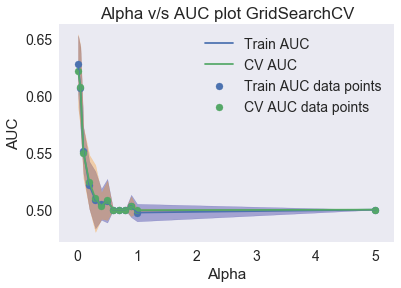

In [331]:
best_c_l1,cv_auc_l1=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l1')

### SVM using GridsearchCV, l2

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.8038401716676946, 0.7201005826445568], 0.05: [0.7680948165301772, 0.7253068921035287], 0.1: [0.7498785751160025, 0.7189368846435193], 0.2: [0.7307536511478474, 0.7088648711192217], 0.3: [0.7194564528764239, 0.7017375322796905], 0.4: [0.7114480852692774, 0.6959873447856024], 0.5: [0.7055084468062026, 0.6918356771143572], 0.6: [0.7009278968813168, 0.6883230614865878], 0.7: [0.6973646489890063, 0.6854809062163333], 0.8: [0.6944416129286164, 0.6831084743363516], 0.9: [0.6919531532308406, 0.6811399992287088], 1.0: [0.6898601616290385, 0.6795782848990239], 5.0: [0.6474406057211214, 0.6418680427682109]}
Best_alpha = 0.05, Best cv_auc = 0.7253068921035287


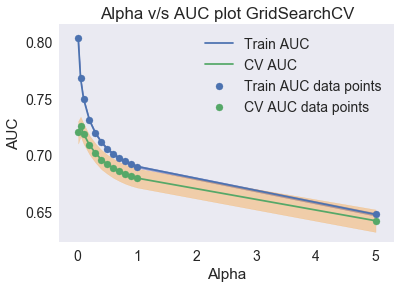

In [332]:
best_c_l2,cv_auc_l2=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l2')

### Traing the model for best c of l1 and l2

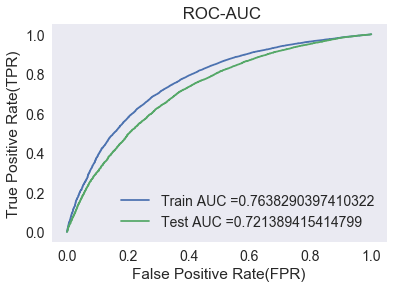

In [333]:
result_cv = [cv_auc_l1,cv_auc_l2]
result_best_c = [best_c_l1,best_c_l2]
num=result_cv.index(max(result_cv))
te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_cv,X_te,y_test,y_train,y_cv,result_best_c[num])

### Trainnig Data

In [334]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.49272832004117106 for threshold 0.088
[[ 5213  2213]
 [12560 29055]]


In [335]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.49272832004117106 for threshold 0.088


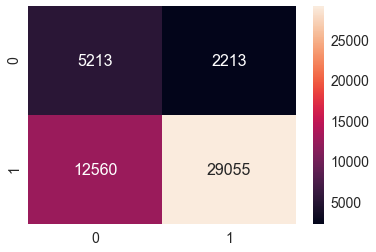

In [336]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [337]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.44724808759278134 for threshold 0.233
[[ 3874  1585]
 [11661 18932]]


In [338]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.44724808759278134 for threshold 0.233


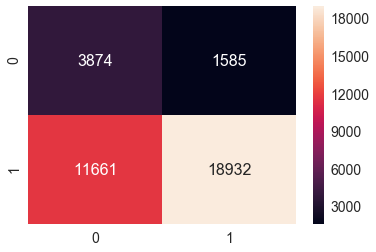

In [339]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.2 Applying SVM on TFIDF,<font color='red'> SET 2</font>

In [340]:
#Sen_train = hstack((pos_standardized_train,neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
#Sen_test = hstack((pos_standardized_test,neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
#Sen_cv = hstack((pos_standardized_cv,neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()

X_tra = hstack((Data_train,title_tfidf_train,text_tfidf_train,pos_standardized_train,
                neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
X_te = hstack((Data_test,title_tfidf_test,text_tfidf_test,pos_standardized_test,
               neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
X_cv = hstack((Data_cv,title_tfidf_cv,text_tfidf_cv,pos_standardized_cv,
               neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()

In [341]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

Final Shape of the Data matrix
(49041, 14393) (49041,)
(36052, 14393) (36052,)
(24155, 14393) (24155,)


### SVM using GridsearchCV, l1

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.6218202663003304, 0.616936844807865], 0.05: [0.6053468020232543, 0.6002610242863499], 0.1: [0.5493732895340775, 0.5493857966072091], 0.2: [0.5309822512564377, 0.53120549026995], 0.3: [0.5017307356009096, 0.5024801906619606], 0.4: [0.508900377285037, 0.5076066760867931], 0.5: [0.5033421817851899, 0.5052439217854096], 0.6: [0.5, 0.5], 0.7: [0.4996483190073344, 0.4982664478543432], 0.8: [0.5013543230853825, 0.5012614663866956], 0.9: [0.5074213702821166, 0.5077277996215686], 1.0: [0.5013297282807745, 0.5020776485201123], 5.0: [0.5, 0.5]}
Best_alpha = 0.01, Best cv_auc = 0.616936844807865


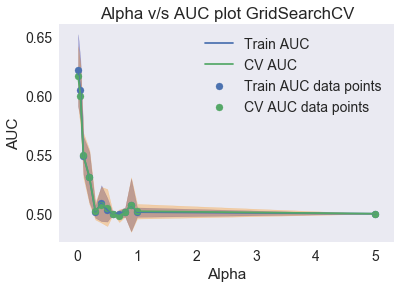

In [342]:
best_c_l1,cv_auc_l1=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l1')

### SVM using GridsearchCV, l2

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.8021571261846114, 0.7174211096497157], 0.05: [0.7676630969944993, 0.7247123799180116], 0.1: [0.7492721697717186, 0.718672289742441], 0.2: [0.7304473622286773, 0.7085661549530305], 0.3: [0.7194408106506041, 0.7016663989022603], 0.4: [0.7113688997080168, 0.6960507881408718], 0.5: [0.7056391964132614, 0.6918464413289467], 0.6: [0.7009580209972012, 0.6881874065077541], 0.7: [0.6973553468162466, 0.6853965896578332], 0.8: [0.6944494474177489, 0.6831141820963971], 0.9: [0.6920186914916753, 0.6812180494254684], 1.0: [0.6898763476730465, 0.679453764649875], 5.0: [0.6476163550330906, 0.6420351470819522]}
Best_alpha = 0.05, Best cv_auc = 0.7247123799180116


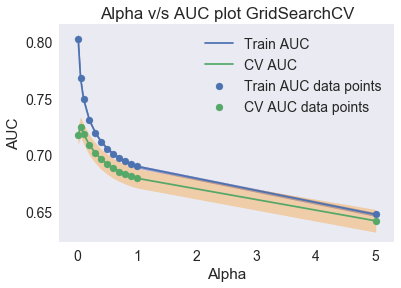

In [343]:
best_c_l2,cv_auc_l2=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l2')

### Traing the model for best c of l1 and l2

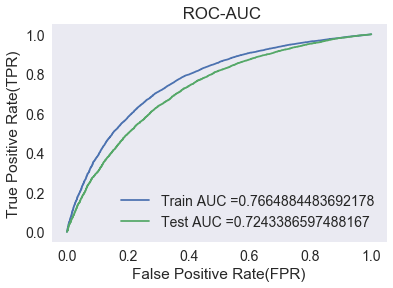

In [344]:
result_cv = [cv_auc_l1,cv_auc_l2]
result_best_c = [best_c_l1,best_c_l2]
num=result_cv.index(max(result_cv))
te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_cv,X_te,y_test,y_train,y_cv,result_best_c[num])

### Trainnig Data

In [345]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.49775197139955835 for threshold -0.157
[[ 5405  2021]
 [13452 28163]]


In [346]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.49775197139955835 for threshold -0.157


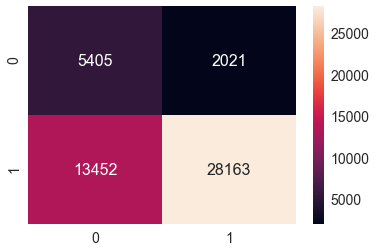

In [347]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [348]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4483542076545485 for threshold -0.078
[[ 3866  1593]
 [11434 19159]]


In [349]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.4483542076545485 for threshold -0.078


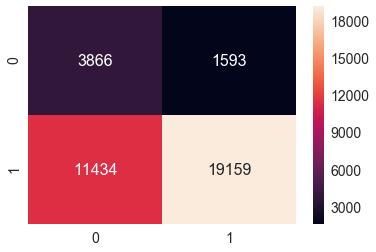

In [350]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.3 Applying SVM on AVG W2V,<font color='red'> SET 3</font>

In [351]:
#Sen_train = hstack((pos_standardized_train,neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
#Sen_test = hstack((pos_standardized_test,neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
#Sen_cv = hstack((pos_standardized_cv,neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()


X_tra = hstack((Data_train,avg_w2v_vectors_titles_train,avg_w2v_vectors_train, pos_standardized_train,
                neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
X_te = hstack((Data_test,avg_w2v_vectors_titles_test,avg_w2v_vectors_test, pos_standardized_test,
               neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
X_cv = hstack((Data_cv,avg_w2v_vectors_titles_cv,avg_w2v_vectors_cv,pos_standardized_cv,neg_standardized_cv, 
               neu_standardized_cv,com_standardized_cv)).tocsr()

In [352]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

Final Shape of the Data matrix
(49041, 707) (49041,)
(36052, 707) (36052,)
(24155, 707) (24155,)


### SVM using GridsearchCV, l1

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.638031677837202, 0.6367601653720258], 0.05: [0.6182197121016687, 0.6183579937143212], 0.1: [0.5533487785516672, 0.55030865953714], 0.2: [0.5, 0.5], 0.3: [0.5, 0.5], 0.4: [0.5, 0.5], 0.5: [0.5, 0.5], 0.6: [0.5, 0.5], 0.7: [0.5, 0.5], 0.8: [0.5, 0.5], 0.9: [0.5, 0.5], 1.0: [0.5, 0.5], 5.0: [0.5, 0.5]}
Best_alpha = 0.01, Best cv_auc = 0.6367601653720258


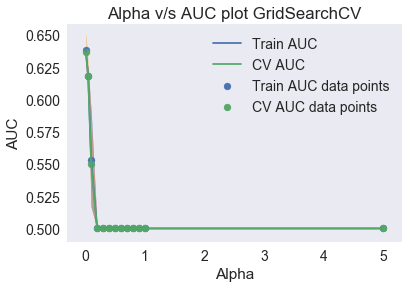

In [353]:
best_c_l1,cv_auc_l1=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l1')

### SVM using GridsearchCV, l2

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.6805273083451631, 0.6713529639566518], 0.05: [0.6582181946684578, 0.6541854556764348], 0.1: [0.6489712982226067, 0.6460116273939586], 0.2: [0.6383936697725741, 0.6355543809233184], 0.3: [0.6289593390817803, 0.6265348609953575], 0.4: [0.6208866029880615, 0.6185747714171808], 0.5: [0.6128126127552269, 0.6109535802004122], 0.6: [0.6066388295209272, 0.6049858146100601], 0.7: [0.600685439321137, 0.5990626796558794], 0.8: [0.5970989303014422, 0.5955723584373301], 0.9: [0.5941933802257211, 0.5927042753349301], 1.0: [0.5918418204412593, 0.5905029005410755], 5.0: [0.5871415378209726, 0.5859502253771979]}
Best_alpha = 0.01, Best cv_auc = 0.6713529639566518


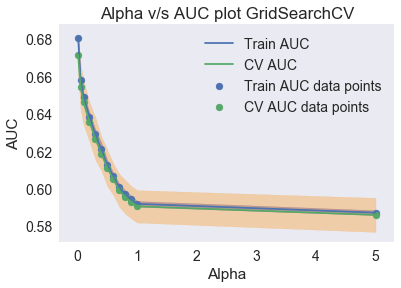

In [354]:
best_c_l2,cv_auc_l2=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l2')

### Traing the model for best c of l1 and l2

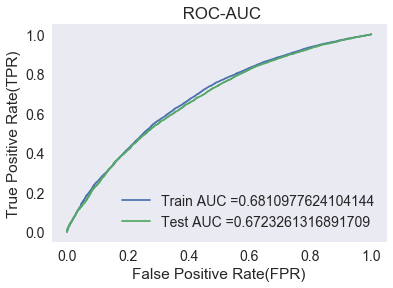

In [355]:
result_cv = [cv_auc_l1,cv_auc_l2]
result_best_c = [best_c_l1,best_c_l2]
num=result_cv.index(max(result_cv))
te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_cv,X_te,y_test,y_train,y_cv,result_best_c[num])

### Training Data

In [356]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4026749377145787 for threshold 0.088
[[ 4618  2808]
 [14854 26761]]


In [357]:

conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.4026749377145787 for threshold 0.088


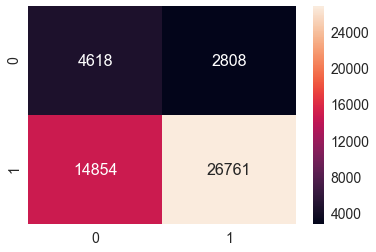

In [358]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [359]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.392761851620194 for threshold 0.303
[[ 4000  1459]
 [14994 15599]]


In [360]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.392761851620194 for threshold 0.303


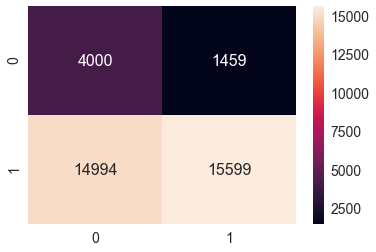

In [361]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4.4 Applying SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [362]:
#Sen_train = hstack((pos_standardized_train,neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
#Sen_test = hstack((pos_standardized_test,neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
#Sen_cv = hstack((pos_standardized_cv,neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()


X_tra = hstack((Data_train,tfidf_w2v_vectors_titles_train,tfidf_w2v_vectors_train, pos_standardized_train,
                neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
X_te = hstack((Data_test,tfidf_w2v_vectors_titles_test,tfidf_w2v_vectors_test, pos_standardized_test,
               neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
X_cv = hstack((Data_cv,tfidf_w2v_vectors_titles_cv,tfidf_w2v_vectors_cv,pos_standardized_cv,
               neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()

In [363]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

Final Shape of the Data matrix
(49041, 707) (49041,)
(36052, 707) (36052,)
(24155, 707) (24155,)


### SVM using GridsearchCV, l1

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.6389325003809716, 0.6372007625937925], 0.05: [0.6136805488378748, 0.6125121451898464], 0.1: [0.5280006969223272, 0.5281018151763645], 0.2: [0.4945422783147726, 0.49529354854126384], 0.3: [0.5, 0.5], 0.4: [0.5, 0.5], 0.5: [0.5016487968027314, 0.5008862964120154], 0.6: [0.5, 0.5], 0.7: [0.5, 0.5], 0.8: [0.5, 0.5], 0.9: [0.5, 0.5], 1.0: [0.5, 0.5], 5.0: [0.5, 0.5]}
Best_alpha = 0.01, Best cv_auc = 0.6372007625937925


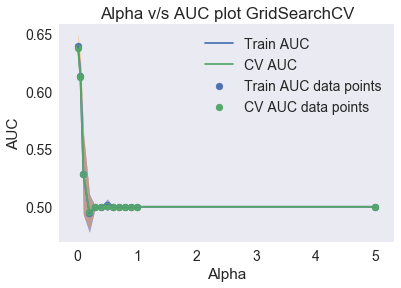

In [364]:
best_c_l1,cv_auc_l1=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l1')

### SVM using GridsearchCV, l2

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.7004451366742668, 0.6908750285397154], 0.05: [0.6745894792310749, 0.6700648942612967], 0.1: [0.6622442939649125, 0.6581830501120074], 0.2: [0.6485484744629196, 0.6450532234601679], 0.3: [0.6372663416151416, 0.6344380668718932], 0.4: [0.628114856699731, 0.6257264231628448], 0.5: [0.6196851231454985, 0.6175356786330819], 0.6: [0.6126793145741457, 0.6106496595612787], 0.7: [0.6070142758293868, 0.6051705237068296], 0.8: [0.6028659015647148, 0.6012274124266689], 0.9: [0.5993980079429952, 0.5978034260815722], 1.0: [0.5976991921136087, 0.5961881423403789], 5.0: [0.5929099593490831, 0.5914425261327529]}
Best_alpha = 0.01, Best cv_auc = 0.6908750285397154


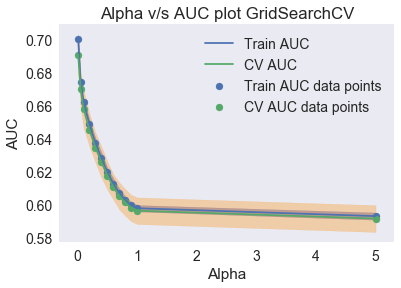

In [365]:
best_c_l2,cv_auc_l2=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l2')

### Traing the model for best c of l1 and l2

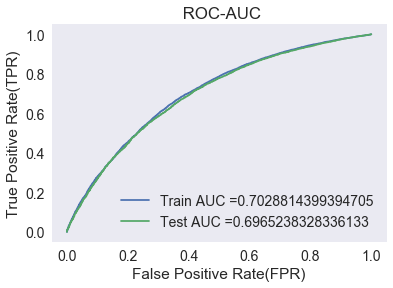

In [366]:
result_cv = [cv_auc_l1,cv_auc_l2]
result_best_c = [best_c_l1,best_c_l2]
num=result_cv.index(max(result_cv))
te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_cv,X_te,y_test,y_train,y_cv,result_best_c[num])

### Training Data 

In [367]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.42730420464171154 for threshold 0.019
[[ 5020  2406]
 [15615 26000]]


In [368]:

conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.42730420464171154 for threshold 0.019


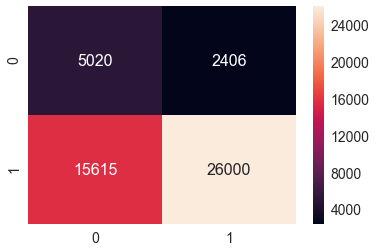

In [369]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [370]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.41894149142216264 for threshold 0.228
[[ 4182  1277]
 [15205 15388]]


In [371]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.41894149142216264 for threshold 0.228


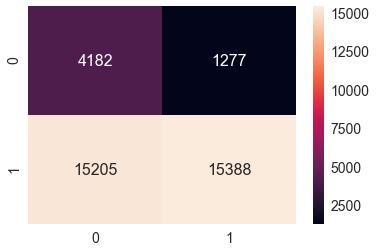

In [372]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h2>Set 5 Categorial Featrues, Numerical Features by TruncatedSVD on TfidfVectorizer </h2>

In [373]:
X_tra = hstack((Data_train,title_tfidf_train,text_tfidf_train,pos_standardized_train,
                neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
X_te = hstack((Data_test,title_tfidf_test,text_tfidf_test,pos_standardized_test,
               neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
X_cv = hstack((Data_cv,title_tfidf_cv,text_tfidf_cv,pos_standardized_cv,
               neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()

In [374]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

Final Shape of the Data matrix
(49041, 14393) (49041,)
(36052, 14393) (36052,)
(24155, 14393) (24155,)


### NOTE
 - Dimensionality reduction using truncated SVD (aka LSA).

    This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

    In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

    This estimator supports two algorithms: a fast randomized SVD solver, and a “naive” algorithm that uses ARPACK as an eigensolver on (X X.T) or (X.T X), whichever is more efficient.

In [126]:
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD
index = [1,5,10,50,100,250,500,1000,2000,5000,6000,7000,8000,9000,10000]
variance_sum = []

for i in tqdm(index):
    svd = TruncatedSVD(n_components= i, n_iter=7, random_state=42)
    svd.fit(text_tfidf_train)
    variance_sum.append(svd.explained_variance_ratio_.sum())

100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [2:04:14<00:00, 496.97s/it]


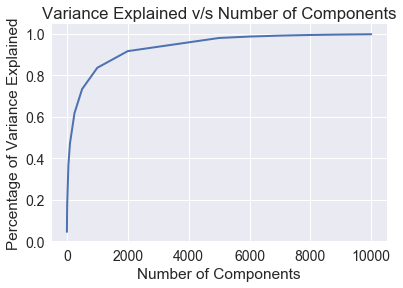

In [127]:
plt.xlabel("Number of Components")
plt.ylabel("Percentage of Variance Explained")
plt.title("Variance Explained v/s Number of Components")
plt.plot(index,variance_sum,lw=2)
plt.show()


### Summary
  - With increase in the number of components ,Percentage of Variance explained also increses, and after a certain point it tapers and becomes contant.
  - We can see that at No. of components =2000 , 90% variance is explained

### Training Data for SVD

In [128]:
svd = TruncatedSVD(n_components= 2000, n_iter=7, random_state=42)
svd.fit(text_tfidf_train)
svd_train = svd.transform(text_tfidf_train)

In [129]:
print("Shape of matrix after Decomposition ",svd_train.shape)

Shape of matrix after Decomposition  (49041, 2000)


### Test Data for SVD

In [130]:
svd_test = svd.transform(text_tfidf_test)
print("Shape of matrix after Decomposition ",svd_test.shape)

Shape of matrix after Decomposition  (36052, 2000)


###  CV Data for SVD

In [131]:
svd_cv = svd.transform(text_tfidf_cv)
print("Shape of matrix after Decomposition ",svd_cv.shape)

Shape of matrix after Decomposition  (24155, 2000)


In [214]:
X_tra = hstack((Data_train,pos_standardized_train,
                neg_standardized_train, neu_standardized_train,com_standardized_train,svd_train)).tocsr()
X_te = hstack((Data_test,pos_standardized_test,
               neg_standardized_test, neu_standardized_test,com_standardized_test,svd_test)).tocsr()
X_cv = hstack((Data_cv,pos_standardized_cv,
               neg_standardized_cv, neu_standardized_cv,com_standardized_cv,svd_cv)).tocsr()

In [215]:
print("Final Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_cv.shape)
print(X_cv.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 2107) (49041,)
(36052, 2107) (24155,)
(24155, 2107) (36052,)


### SVM using GridsearchCV, l1

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.577873043664892, 0.5768064934587939], 0.05: [0.559156858281488, 0.559905647810878], 0.1: [0.5579329228811478, 0.5580313984534067], 0.2: [0.5578493873322047, 0.5577933499396827], 0.3: [0.557766001582689, 0.5577258338915471], 0.4: [0.557766001582689, 0.5577258338915471], 0.5: [0.557766001582689, 0.5577258338915471], 0.6: [0.557766001582689, 0.5577258338915471], 0.7: [0.557766001582689, 0.5577258338915471], 0.8: [0.557766001582689, 0.5577258338915471], 0.9: [0.557766001582689, 0.5577258338915471], 1.0: [0.557766001582689, 0.5577258338915471], 5.0: [0.557766001582689, 0.5577258338915471]}
Best_alpha = 0.01, Best cv_auc = 0.5768064934587939


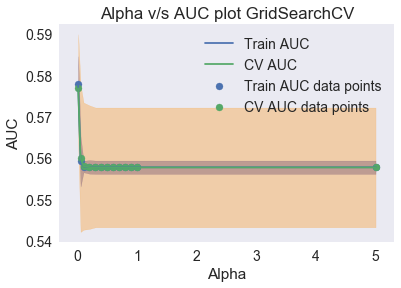

In [216]:
best_c_l1,cv_auc_l1=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l1')

### SVM using GridsearchCV, l2

ERROR PLOTS for alpha value with GridSearchCV
{0.01: [0.7323650375981413, 0.6747734460797803], 0.05: [0.7017856870166377, 0.6552651683171377], 0.1: [0.6772644822051679, 0.6410788652903497], 0.2: [0.6531703748520636, 0.6298812436545721], 0.3: [0.6395116316782062, 0.6227851691481932], 0.4: [0.6303117912744023, 0.6171691804501689], 0.5: [0.6237007199404523, 0.6130473460091481], 0.6: [0.6190068206146161, 0.6102127261188472], 0.7: [0.6146551086355225, 0.6072851220844923], 0.8: [0.6112942465398415, 0.6049286555555612], 0.9: [0.6086333748956432, 0.6030328793191639], 1.0: [0.6060107225983735, 0.6009963811969212], 5.0: [0.5757516656363881, 0.5747224223312539]}
Best_alpha = 0.01, Best cv_auc = 0.6747734460797803


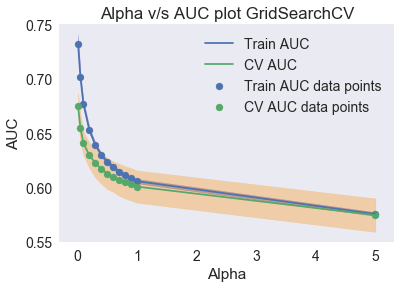

In [217]:
best_c_l2,cv_auc_l2=find_Best_Kvalue(X_tra,X_cv,X_te,y_test,y_train,y_cv,'GridSearchCV','l2')

### Traing the model for best c of l1 and l2

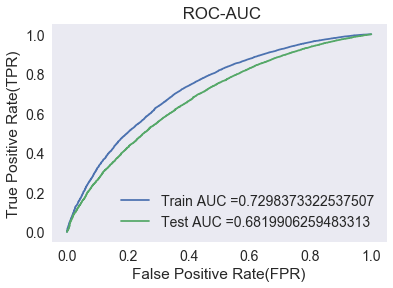

In [218]:
result_cv = [cv_auc_l1,cv_auc_l2]
result_best_c = [best_c_l1,best_c_l2]
num=result_cv.index(max(result_cv))
te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_cv,X_te,y_test,y_train,y_cv,result_best_c[num])

### Training Data

In [219]:
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4511717211809652 for threshold 1.188
[[ 5372  2054]
 [16569 25046]]


In [220]:

conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.4511717211809652 for threshold 1.188


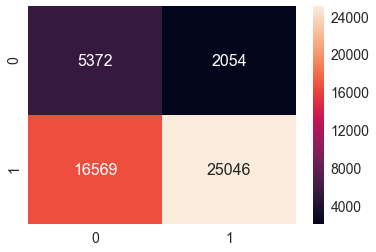

In [221]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

### Test Data

In [222]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.40004366997690943 for threshold 1.2
[[ 3817  1642]
 [13501 17092]]


In [223]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.40004366997690943 for threshold 1.2


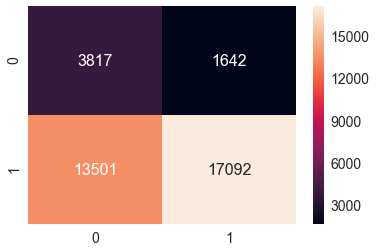

In [224]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

<h1>3. Conclusions</h1>

In [375]:
# Please compare all your models using Prettytable library

# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer Used", "Model"," l1:(Lambda,AUC) VS l2(Lambda,AUC)","Best Penalty among l1 and l2","Lambda", "AUC-Score"]

x.add_row(["BOW",           "Linear SVM(SGD)",['l1:(0.01,0.62) l2:(0.05,0.73)'],"L2", 0.05, 0.72])
x.add_row(["TFIDF",         "Linear SVM(SGD)",['l1:(0.01,0.62) l2:(0.05,0.73)'],"L2", 0.05, 0.72])
x.add_row(["AVG W2V",       "Linear SVM(SGD)",['l1:(0.01,0.64) l2:(0.01,0.67)'],"L2", 0.01, 0.67])
x.add_row(["TFIDF W2V",     "Linear SVM(SGD)",['l1:(0.01,0.64) l2:(0.01,0.69)'],"L2", 0.01, 0.70])
x.add_row(["TRUNCATED SVD", "Linear SVM(SGD)",['l1:(0.01,0.58) l2:(0.01,0.68)'],"L2", 0.01, 0.68])


print(x)

+-----------------+-----------------+------------------------------------+------------------------------+--------+-----------+
| Vectorizer Used |      Model      |  l1:(Lambda,AUC) VS l2(Lambda,AUC) | Best Penalty among l1 and l2 | Lambda | AUC-Score |
+-----------------+-----------------+------------------------------------+------------------------------+--------+-----------+
|       BOW       | Linear SVM(SGD) | ['l1:(0.01,0.62) l2:(0.05,0.73)']  |              L2              |  0.05  |    0.72   |
|      TFIDF      | Linear SVM(SGD) | ['l1:(0.01,0.62) l2:(0.05,0.73)']  |              L2              |  0.05  |    0.72   |
|     AVG W2V     | Linear SVM(SGD) | ['l1:(0.01,0.64) l2:(0.01,0.67)']  |              L2              |  0.01  |    0.67   |
|    TFIDF W2V    | Linear SVM(SGD) | ['l1:(0.01,0.64) l2:(0.01,0.69)']  |              L2              |  0.01  |    0.7    |
|  TRUNCATED SVD  | Linear SVM(SGD) | ['l1:(0.01,0.58) l2:(0.01,0.68)']  |              L2              |  0.01